<a href="https://colab.research.google.com/github/mzeleniy/MIT-futuremakers/blob/main/day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam, SGD 
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import mnist
import tensorflow as tf


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

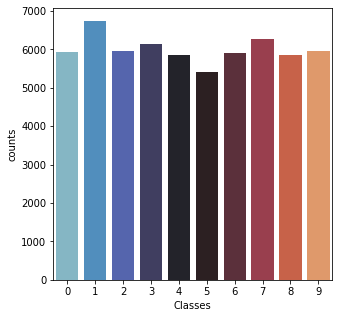

In [4]:
#label counts
plt.figure(figsize=(5,5))
g = sns.countplot(y_train, palette='icefire')
plt.xlabel("Classes")
plt.ylabel("counts")

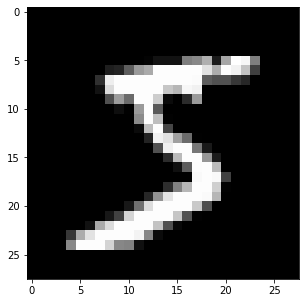

In [5]:


img = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img,cmap = "gray")

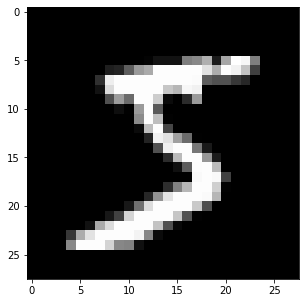

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

img2 = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img2,cmap = "gray")

In [7]:
from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#reshape.4D(Batch_size, height, width, channel)

In [9]:
# Building our architecture

#conv - pooling - conv - pool - flatten - dense - dense

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [11]:
#Adam(learning_rate=0.01)
optimer = SGD(learning_rate=0.01, momentum=0.99)
#optimizer


In [12]:
model.compile(optimizer=optimer,loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
EPOCHS = 10


In [16]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9618 - accuracy: 0.7232 - val_loss: 1.4340 - val_accuracy: 0.5714
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2560 - accuracy: 0.1570 - val_loss: 2.3149 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3073 - accuracy: 0.1047 - val_loss: 2.3061 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3086 - accuracy: 0.1038 - val_loss: 2.3093 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3069 - accuracy: 0.1056 - val_loss: 2.3154 - val_accuracy: 0.1028
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3074 - accuracy: 0.1066 - val_loss: 2.3052 - val_accuracy: 0.1028
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3076 - accuracy: 0.1047 - val_loss: 2.3096 - val_accuracy:

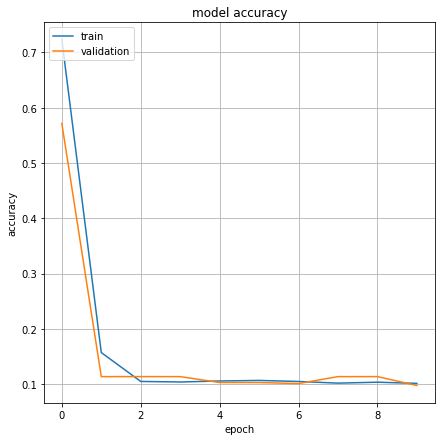

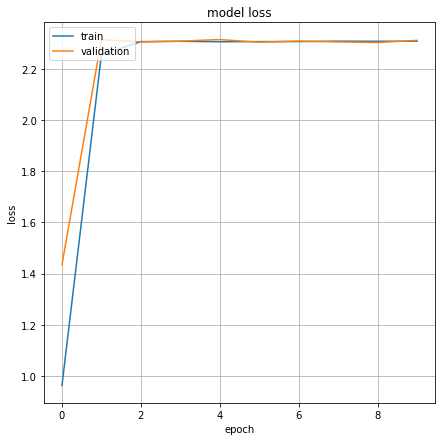

In [22]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show()